 <img src=".\figures\motto2.png">
 
 https://github.com/aymanalz/pygsflow
 
# Introduction to PyGSFLOW

Simulating integrated hydrological systems requires working with a large set of input parameters and output variables that are saved in several files. Thus, changing input parameters and reading output can be laborious task. This is particularly true in  model calibration and sensitivity and uncertainty analysis. PyGSFLOW allows modeler to focus on the hydrologic aspect of the problem as it simplifies most of modeling operations such as modifying model input files, running the model, and reading and processing the model. PyGSFLOW uses Flopy to work with MODFLOW files.   In this exercise  we will illustrate the basic elements of PyGSFLOW; and in the next exercise we will demonstrate how it can be used to achieve fairly complex tasks using small number of commands. 


In [1]:
from gsflow import Gsflow  # Make sure that Gsflow class is imported. 
import os, sys
import matplotlib.pyplot as plt

flopy is installed in D:\Workspace\classes\gsflowID2447_classrepo\python_packages\flopy\flopy


## pyGSFLOW in a nutshell
pyGSFLOW consists of three main components (See Figures below). These components are: (1) Control class, (2) a PRMS class, and (3) Flopy package.The Control class handles operations and information related the control file. The PRMS objects consists of a number of other classes such as :
    
    (1) the Parameters Class that handles all GSFLOW parameters that can be saved in one (or more) files,
    (2) the Data class that handles Climate Data information.
    (3) The output class that handles some of GSFLOW output. 
 
 The well know Flopy package (under mf class in pyGSFLOW) is used to handle data and operations related to MODFLOW. 
 <img src=".\figures\pyGSFLOW_processes.png">
 
 ### Accessing Data in pyGSFLOW -- The Big Picture
 To access any piece information within the GSFLOW model we will be using class names to navigates subclasses starting from the main class Gsflow. The following figure illustrates how this can be accomplished
 
  <img src=".\figures\pyGSFLOW_processes2.png">
  
 
 


<img src=".\figures\warning.png"> WARNING: PyGSLFOW is a new package that is still under development. Some of the features that are not supported includes:
(1) Reading and processing animation files and PRMS budget files,
(2) Tools to check for errors in input files. 

https://github.com/aymanalz/pygsflow


## Exercise 
### (1) Loading an existing GSFLOW project 
Let us start by loading an existing GSFLOW project. To do so we need to pass the control file to the Gsflow
 class that will upload information from model input files.

In [2]:
control_file = r"../models_data/prms/windows/sagehen.control"
gs = Gsflow(control_file = control_file)


PyGSFLOW ------ V0.0
Control file is loaded
Working on loading PRMS model ...
Parameters will be read from a file/ files...
Work on loadind the parameter files .....
Prms model is loaded .....
There are no Modflow files, PRMS model only


### (2) Access data in GSFLOW inputs
The "gs" variable in the previous cell is a name for the object that holds information about the two components of GSFLOW : PRMS and MODFLOW. 

### (2.a) Control Class 
To access control information you can do something like

gs.control.SOMEFUNCTION()

For example, to get a list of records in a control file ...

In [3]:
gs.control.get_record_names()

['mapOutVar_names',
 'nmapOutVars',
 'mapOutON_OFF',
 'parameter_check_flag',
 'prms_warmup',
 'aniOutON_OFF',
 'print_debug',
 'aniOutVar_names',
 'ani_output_file',
 'csv_output_file',
 'model_output_file',
 'data_file',
 'dispGraphsBuffSize',
 'dispVar_element',
 'dispVar_names',
 'dispVar_plot',
 'end_time',
 'et_module',
 'executable_desc',
 'executable_model',
 'gsflow_output_file',
 'init_vars_from_file',
 'initial_deltat',
 'mms_user_dir',
 'mms_user_out_dir',
 'model_mode',
 'modflow_name',
 'naniOutVars',
 'ndispGraphs',
 'param_file',
 'precip_module',
 'param_print_file',
 'save_vars_to_file',
 'solrad_module',
 'srunoff_module',
 'start_time',
 'nstatVars',
 'statVar_element',
 'statVar_names',
 'stat_var_file',
 'statsON_OFF',
 'cascade_flag',
 'cascadegw_flag',
 'temp_module',
 'var_save_file',
 'stats_output_file',
 'var_init_file',
 'rpt_days',
 'capillary_module',
 'parameter_check_flag',
 'print_debug']

In [4]:
# Assuming that we are interested in looking closer into ET Module 
et_module = gs.control.get_record('et_module')

In [5]:
# Notice that the result is an object for the et_module...
print(et_module) # printing the object will generate a standard PRMS template for the record as it appears in 
                 # the control file.  


####
et_module
1
4
potet_jh
####


<img style="float: left;" src = "./figures/Qs.PNG" width="20">  
### Can you get the starting date from the control object?

In [6]:

start_date = gs.control.get_record('start_time')
print(start_date) # Notice that when the number of values in the record is large, pyGSFLOW echos
                                           # the first four value to make the print compact. 



####
start_time
6
1
1982
8
1
0.
.
.
####


In [7]:
## explore data in the control_record object
start_date.values

array([1982,    8,    1,    0,    0,    0])

In [8]:
# Values in any record can be accessed use .get_values() function
gs.control.get_values("start_time")


array([1982,    8,    1,    0,    0,    0])

In [9]:
# We can also change the value of a control record as follows
gs.control.set_values(name='start_time', values=[1990,1,1,0,0,0])
gs.control.get_values("start_time")

array([1990,    1,    1,    0,    0,    0])

In [10]:
# what about adding a new record to the control file?
gs.control.add_record(name = "xyz", values = [1, 2]) # Notice that we do not check whether the new record is valid or not.
print(gs.control.get_record('xyz'))




####
xyz
2
1
1
2
####


In [11]:

# Let us see its location in the control file...
gs.control.get_record_names()
#Test adding the record any place you like

['mapOutVar_names',
 'nmapOutVars',
 'mapOutON_OFF',
 'parameter_check_flag',
 'prms_warmup',
 'aniOutON_OFF',
 'print_debug',
 'aniOutVar_names',
 'ani_output_file',
 'csv_output_file',
 'model_output_file',
 'data_file',
 'dispGraphsBuffSize',
 'dispVar_element',
 'dispVar_names',
 'dispVar_plot',
 'end_time',
 'et_module',
 'executable_desc',
 'executable_model',
 'gsflow_output_file',
 'init_vars_from_file',
 'initial_deltat',
 'mms_user_dir',
 'mms_user_out_dir',
 'model_mode',
 'modflow_name',
 'naniOutVars',
 'ndispGraphs',
 'param_file',
 'precip_module',
 'param_print_file',
 'save_vars_to_file',
 'solrad_module',
 'srunoff_module',
 'start_time',
 'nstatVars',
 'statVar_element',
 'statVar_names',
 'stat_var_file',
 'statsON_OFF',
 'cascade_flag',
 'cascadegw_flag',
 'temp_module',
 'var_save_file',
 'stats_output_file',
 'var_init_file',
 'rpt_days',
 'capillary_module',
 'parameter_check_flag',
 'print_debug',
 'xyz']

In [12]:
# Can you insert the new record in a certan location?
gs.control.add_record(name="hummingbird_2", values=['a', 'b'], after='save_vars_to_file')
gs.control.get_record_names()

['mapOutVar_names',
 'nmapOutVars',
 'mapOutON_OFF',
 'parameter_check_flag',
 'prms_warmup',
 'aniOutON_OFF',
 'print_debug',
 'aniOutVar_names',
 'ani_output_file',
 'csv_output_file',
 'model_output_file',
 'data_file',
 'dispGraphsBuffSize',
 'dispVar_element',
 'dispVar_names',
 'dispVar_plot',
 'end_time',
 'et_module',
 'executable_desc',
 'executable_model',
 'gsflow_output_file',
 'init_vars_from_file',
 'initial_deltat',
 'mms_user_dir',
 'mms_user_out_dir',
 'model_mode',
 'modflow_name',
 'naniOutVars',
 'ndispGraphs',
 'param_file',
 'precip_module',
 'param_print_file',
 'save_vars_to_file',
 'hummingbird_2',
 'solrad_module',
 'srunoff_module',
 'start_time',
 'nstatVars',
 'statVar_element',
 'statVar_names',
 'stat_var_file',
 'statsON_OFF',
 'cascade_flag',
 'cascadegw_flag',
 'temp_module',
 'var_save_file',
 'stats_output_file',
 'var_init_file',
 'rpt_days',
 'capillary_module',
 'parameter_check_flag',
 'print_debug',
 'xyz']

In [14]:
## If you add a new record without specifying the datatype, pyGSFLOW can 
##  guess the data type. A good a practise is to force data type as follows


In [13]:
# Similiar to adding, we can remove the record .
gs.control.remove_record("xyz") 
gs.control.remove_record("hummingbird_2") 
gs.control.get_record("hummingbird_2") # check if the wrong record is removed...

The record does not exist...


### (2.b) Parameters information


In [14]:
gs.prms.parameters.get_record_names()


['ncascade',
 'ncascdgw',
 'ndays',
 'ndepl',
 'ndeplval',
 'nevap',
 'ngw',
 'ngwcell',
 'nhru',
 'nhrucell',
 'nlake',
 'nlake_hrus',
 'nmonths',
 'nobs',
 'nrain',
 'nreach',
 'nsegment',
 'nsnow',
 'nsol',
 'nssr',
 'nsub',
 'ntemp',
 'one',
 'adjmix_rain',
 'basin_tsta',
 'carea_max',
 'dday_intcp',
 'dday_slope',
 'fastcoef_lin',
 'fastcoef_sq',
 'gwflow_coef',
 'hru_percent_imperv',
 'hru_subbasin',
 'hru_tlaps',
 'hru_tsta',
 'jh_coef',
 'pref_flow_den',
 'rain_adj',
 'sat_threshold',
 'slowcoef_lin',
 'slowcoef_sq',
 'smidx_coef',
 'snow_adj',
 'soil_moist_max',
 'soil_rechr_max',
 'ssr2gw_rate',
 'subbasin_down',
 'tmax_allrain',
 'tmax_allsnow',
 'tmax_lapse',
 'tmin_lapse',
 'tsta_elev',
 'cascade_flg',
 'cascade_tol',
 'circle_switch',
 'gvr_cell_id',
 'gw_down_id',
 'gw_pct_up',
 'gw_strmseg_down_id',
 'gw_up_id',
 'hru_down_id',
 'hru_pct_up',
 'hru_strmseg_down_id',
 'hru_up_id',
 'albset_rna',
 'albset_rnm',
 'albset_sna',
 'albset_snm',
 'cecn_coef',
 'den_init',
 'de

In [15]:
# how many parameters are there?
print(len(gs.prms.parameters.get_record_names()))

# Can you get the temperture station for each hru?
gs.prms.parameters.get_values('hru_tsta')

133


array([1, 1, 1, ..., 1, 1, 1])

In [18]:
# Can you change the parameters?

In [16]:
# What can we do else? Explore "Parameters" class?
dir(gs.prms.parameters)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_parameter_files',
 '_record_names',
 'add_record',
 'from_file',
 'get_record',
 'get_record_names',
 'get_values',
 'headers',
 'parameter_files',
 'parameters_list',
 'remove_record',
 'set_values',
 'write']

### (2.c) Data Class (Climate Data)

In [17]:
gs.prms.Data.data_df.head(10)

,Year,Month,Day,Hour,Minute,Second,tmax_0,tmin_0,precip_0,runoff_0,Date
0,1953,10,1,0,0,0,-999,-999,0.0,2.9,1953-10-01
1,1953,10,2,0,0,0,-999,-999,0.0,2.9,1953-10-02
2,1953,10,3,0,0,0,-999,-999,0.0,2.9,1953-10-03
3,1953,10,4,0,0,0,-999,-999,0.0,2.9,1953-10-04
4,1953,10,5,0,0,0,-999,-999,0.0,2.9,1953-10-05
5,1953,10,6,0,0,0,-999,-999,0.0,2.9,1953-10-06
6,1953,10,7,0,0,0,-999,-999,0.0,2.9,1953-10-07
7,1953,10,8,0,0,0,-999,-999,0.0,2.8,1953-10-08
8,1953,10,9,0,0,0,-999,-999,0.0,2.9,1953-10-09
9,1953,10,10,0,0,0,-999,-999,0.0,3.0,1953-10-10


D:\anaconda\envs\gsflow\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


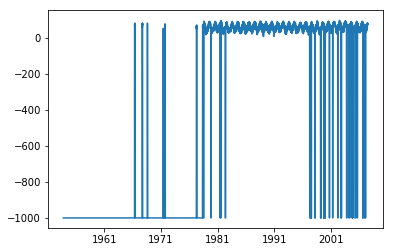

In [18]:
climate_data = gs.prms.Data.data_df
plt.plot(climate_data['Date'], climate_data['tmax_0'])

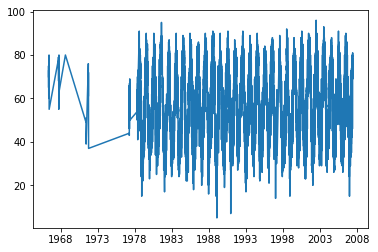

In [19]:
df_to_plot = climate_data[climate_data['tmax_0']>-100]
plt.plot(df_to_plot['Date'], df_to_plot['tmax_0'])

In [20]:
## add a station
climate_data['precip_2'] = 10

In [21]:
climate_data.head(10)

,Year,Month,Day,Hour,Minute,Second,tmax_0,tmin_0,precip_0,runoff_0,Date,precip_2
0,1953,10,1,0,0,0,-999,-999,0.0,2.9,1953-10-01,10
1,1953,10,2,0,0,0,-999,-999,0.0,2.9,1953-10-02,10
2,1953,10,3,0,0,0,-999,-999,0.0,2.9,1953-10-03,10
3,1953,10,4,0,0,0,-999,-999,0.0,2.9,1953-10-04,10
4,1953,10,5,0,0,0,-999,-999,0.0,2.9,1953-10-05,10
5,1953,10,6,0,0,0,-999,-999,0.0,2.9,1953-10-06,10
6,1953,10,7,0,0,0,-999,-999,0.0,2.9,1953-10-07,10
7,1953,10,8,0,0,0,-999,-999,0.0,2.8,1953-10-08,10
8,1953,10,9,0,0,0,-999,-999,0.0,2.9,1953-10-09,10
9,1953,10,10,0,0,0,-999,-999,0.0,3.0,1953-10-10,10


In [22]:
#climate_data = climate_data.drop("precip_2", axis=1)
gs.prms.Data.data_df.drop("precip_2", axis=1, inplace=True)
gs.prms.Data.data_df

,Year,Month,Day,Hour,Minute,Second,tmax_0,tmin_0,precip_0,runoff_0,Date
0,1953,10,1,0,0,0,-999,-999,0.000,2.90,1953-10-01
1,1953,10,2,0,0,0,-999,-999,0.000,2.90,1953-10-02
2,1953,10,3,0,0,0,-999,-999,0.000,2.90,1953-10-03
3,1953,10,4,0,0,0,-999,-999,0.000,2.90,1953-10-04
4,1953,10,5,0,0,0,-999,-999,0.000,2.90,1953-10-05
5,1953,10,6,0,0,0,-999,-999,0.000,2.90,1953-10-06
6,1953,10,7,0,0,0,-999,-999,0.000,2.90,1953-10-07
7,1953,10,8,0,0,0,-999,-999,0.000,2.80,1953-10-08
8,1953,10,9,0,0,0,-999,-999,0.000,2.90,1953-10-09
9,1953,10,10,0,0,0,-999,-999,0.000,3.00,1953-10-10


### (2.d) Access MODFLOW data in pyGSFLOW 
All data related to MODFLOW can be accessed and assigned using .mf object. This object is a Flopy instant; thus all operations we learnt about Flopy can be used here. 

In [26]:
!jupyter nbconvert --to script pygsflow_intro.ipynb

[NbConvertApp] Converting notebook pygsflow_intro.ipynb to script
[NbConvertApp] Writing 7014 bytes to pygsflow_intro.py
